# Cervical Cancer
**Cancer** is a condition in which the cells in our body multiply and grow out of control. **Cervical cancer** is the fourth most common cancer in women, with a death rate of about 300,000 worldwide. The tumour develops in a woman's cervix, which is the entrance to the uterus from the vagina, and anybody with a cervix is at risk. HPV or the Human Papiloma Virus is a key factor that increases risk of cervical cancer (engaging in high sexual activity). This cancer can be prevented by PAP smear screening and a HPV vaccine. 

**Symptoms** include bleeding in between periods and after sexual intercourse. Foul smelling white discharge and low back pain or lower abdominal pain may also occur. In some cases there may be no symptoms. **Treatments** include surgery, radiation and chemotherapy. 

Other factors which contribute to the risk are having many children, smoking, and presence of hormones in oral contraceptives. Unlike most other forms of cancer, cervical cancer, if diagonised early can be successfully treated and eliminated. By leveraging machine learning and AI, the presence of cervical cancer in a patient can be predicted, thereby dramatically improving early detection and diagnosis.

This project encapsulates building, training, and evaluating an **XGBoost Classifier Model** using data from 858 patients to predict their **biopsy results**. The XGBoost algorithm, or the extreme gradient boost algorithm is a popular algorithm used for regression and classification models. The dataset has been procured from *Hospital Universitario de Caracas* in Venezuela. I will explore the dataset to understand the kind of information provided. Following this, I will train an XGBoost classifier and evaluate its metrics. 

# Importing Libraries 

In [80]:
# Import libraries
import pandas as pd # dataframe manipulation
import numpy as np # numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt # interactive data visualization
import zipfile


In [81]:
# Import dataset
cervical_df = pd.read_csv('cervical_cancer.csv')
cervical_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


I've imported the relevent libraries that will be used in the project, and have also imported the dataframe from the CSV file. The dataframe has 36 features and 858 observations. Some of the features of the patients are:
* Age 
* Number of Sexual Partners
* Number of Pregnancies
* Smokes
* Hormonal Contraceptives
* IUD(Intrauterine device- used for birth control) etc, up till Dx. 

These features will be used as input for training and testing the model. All of these features play some role in causing cervical cancer in women. 

Let us now look at the last four columns in the dataframe. 
1. Hinselmann is a colonoscopy procedure in which doctors examine the cervix
2. Schiller is an iodine test used for cervical cancer diagnosis
3. Cytology is used to examine a single cell type in cancer screening
4. Biopsy is done by removing a piece of tissue and examining it under a microscope to diagonise cancer (most accurate of all)

While any of these 4 columns can be predicted in our analysis, in this project, I will focus on training a model to predict the Biopsy column. 

# Data Preprocessing

In [82]:
# Get dataframe information
cervical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

There seem to be no null values in the dataframe. Although, a quick look at it shows quite a few question marks in place of a value, which represent null values. So we will replace all the '?' with NaN.

In [83]:
# Replace ? with NaN
cervical_df = cervical_df.replace('?', np.nan)
cervical_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


That is perfect. Now I can input a command to find out how many null values are present in the dataframe.

In [84]:
# Check for null values in the dataframe
cervical_df.isnull()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


We can also plot a heatmap to visually represent the null values in the dataframe.

<AxesSubplot:>

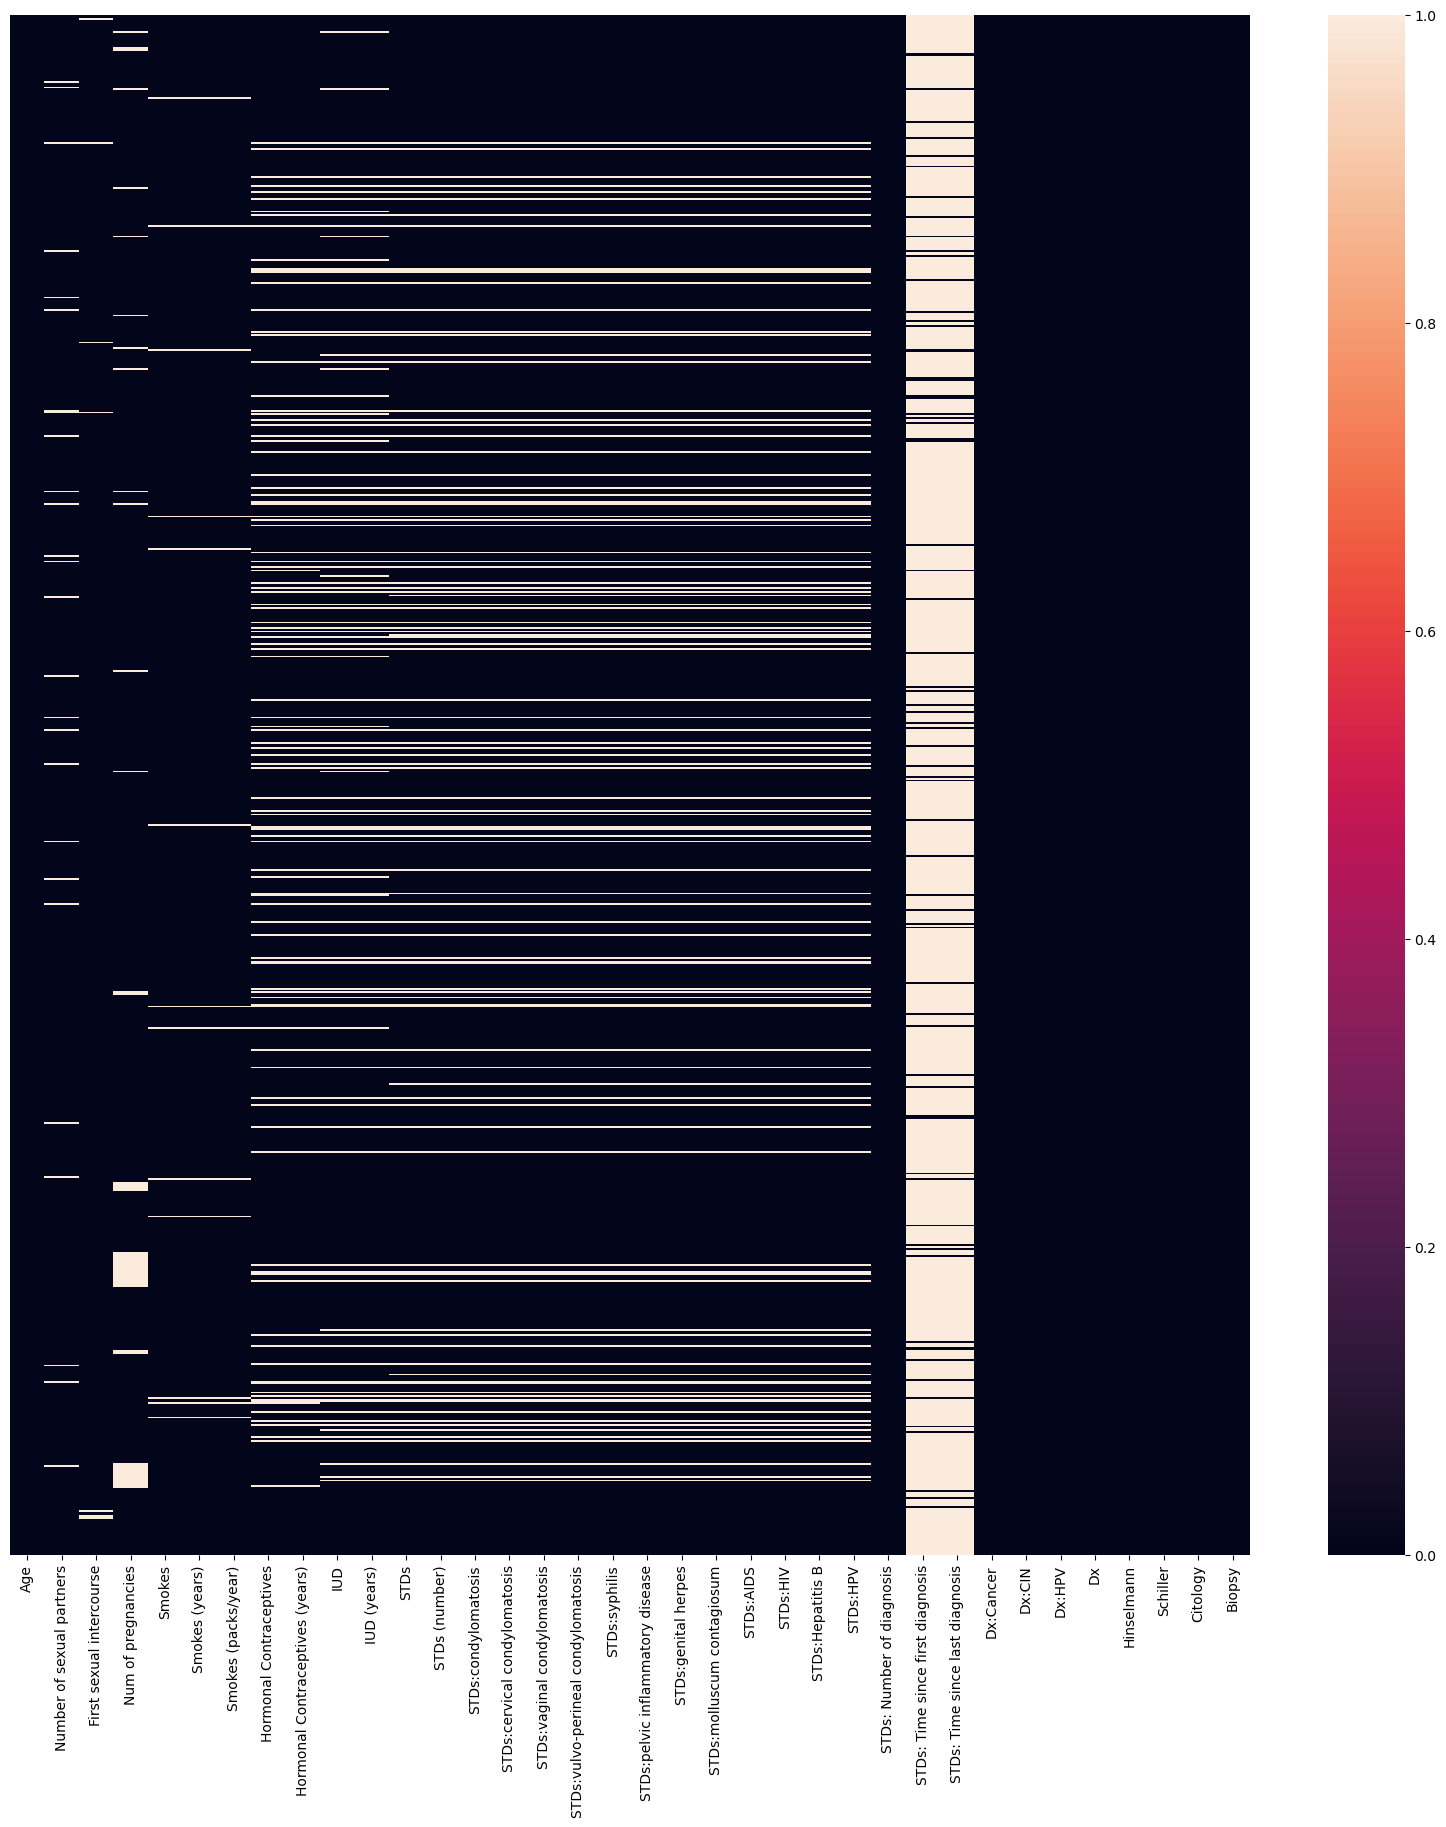

In [85]:
# Plot a heatmap for null values
plt.figure(figsize= (20,20))
sns.heatmap(cervical_df.isnull(), yticklabels = False)

I have now plotted all the locations where there are null elements. It looks like the **STDs: Time since first diagnosis** and **STDs: Time since last diagnosis** have a large number of missing values. I could drop the columns since I don't have a lot of useful information here. I'll just take a look at the dataframe's information once again before performing this task.

In [86]:
# Check info again
cervical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

It is now clear that there are quite a few null values in the dataset. But, the highest number of missing values are present in the two columns I'd mentioned before. So, I will go ahead and drop them.

In [87]:
# Drop unnecessary columns
cervical_df = cervical_df.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
cervical_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


After dropping the two columns, I now have **34 columns** instead of the original 36. From the previous information, it is seen that most of the columns are of the **'object'** data type. Performing aggregations on these values might give inaccurate results. The next step is to convert all these objects into **numerics**. 

In [88]:
# Convert object datatypes into numerics 
cervical_df = cervical_df.apply(pd.to_numeric)
cervical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

All the objects have been converted to float types. That is wonderful. Now, aggregation can be done. 

In [89]:
# Statistics of dataframe
cervical_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the columns have been aggregated to calculate their **count, mean, standard deviation, and interquartile ranges**. For example, the minimum number of sexual partners is 1, and the maximum number of sexual pertners is 28, and the maximum number of pregnancies is 11! The minimum number of smokes per year is 0, and the maximum is 37, while the avergae smokes per year is about 0.45. Now that I have the average values of all the columns,I can replace all the null values with their respective means.

In [90]:
# Replace null values with means
cervical_df = cervical_df.fillna(cervical_df.mean())
cervical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

Voila, and now there are **no null values** remaining in any column. I will also plot the **heatmap** to visualize this change. 

<AxesSubplot:>

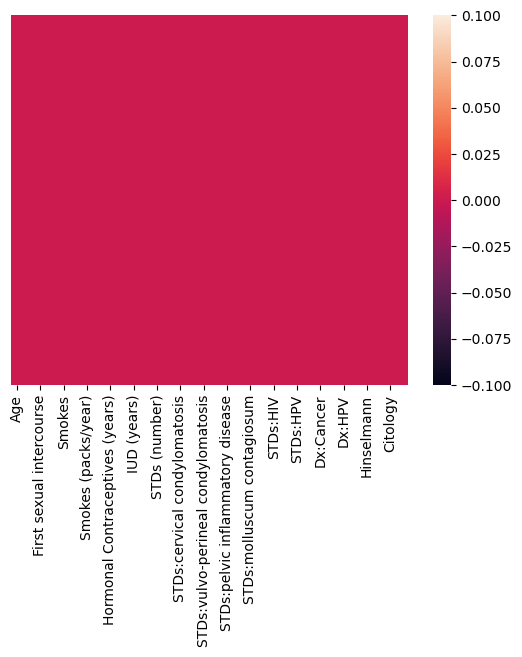

In [91]:
# Plot heatmap
sns.heatmap(cervical_df.isnull(), yticklabels= False)

The **homogoenous** color indicates that there are no null values in the dataset. 

In [92]:
# Preprocessed data
cervical_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# Data Visualization
The dataset has been preprocessed and cleaned. I will now visualize the dataset before moving ahead to training the model. The first thing to do would be to obtain the **correlation** between all the features. Creating a **correlation matirx** would be the best way to go about it. 

In [93]:
# Create a correlation matrix
correlation_matrix = cervical_df.corr()
correlation_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


This shows the correlations between all the features in the dataset. A number close to 1 denotes almost perfect correlation, while a number close to 0 denotes an almost no correlation. This matrix can be visualized using a heatmap for better understanding. 

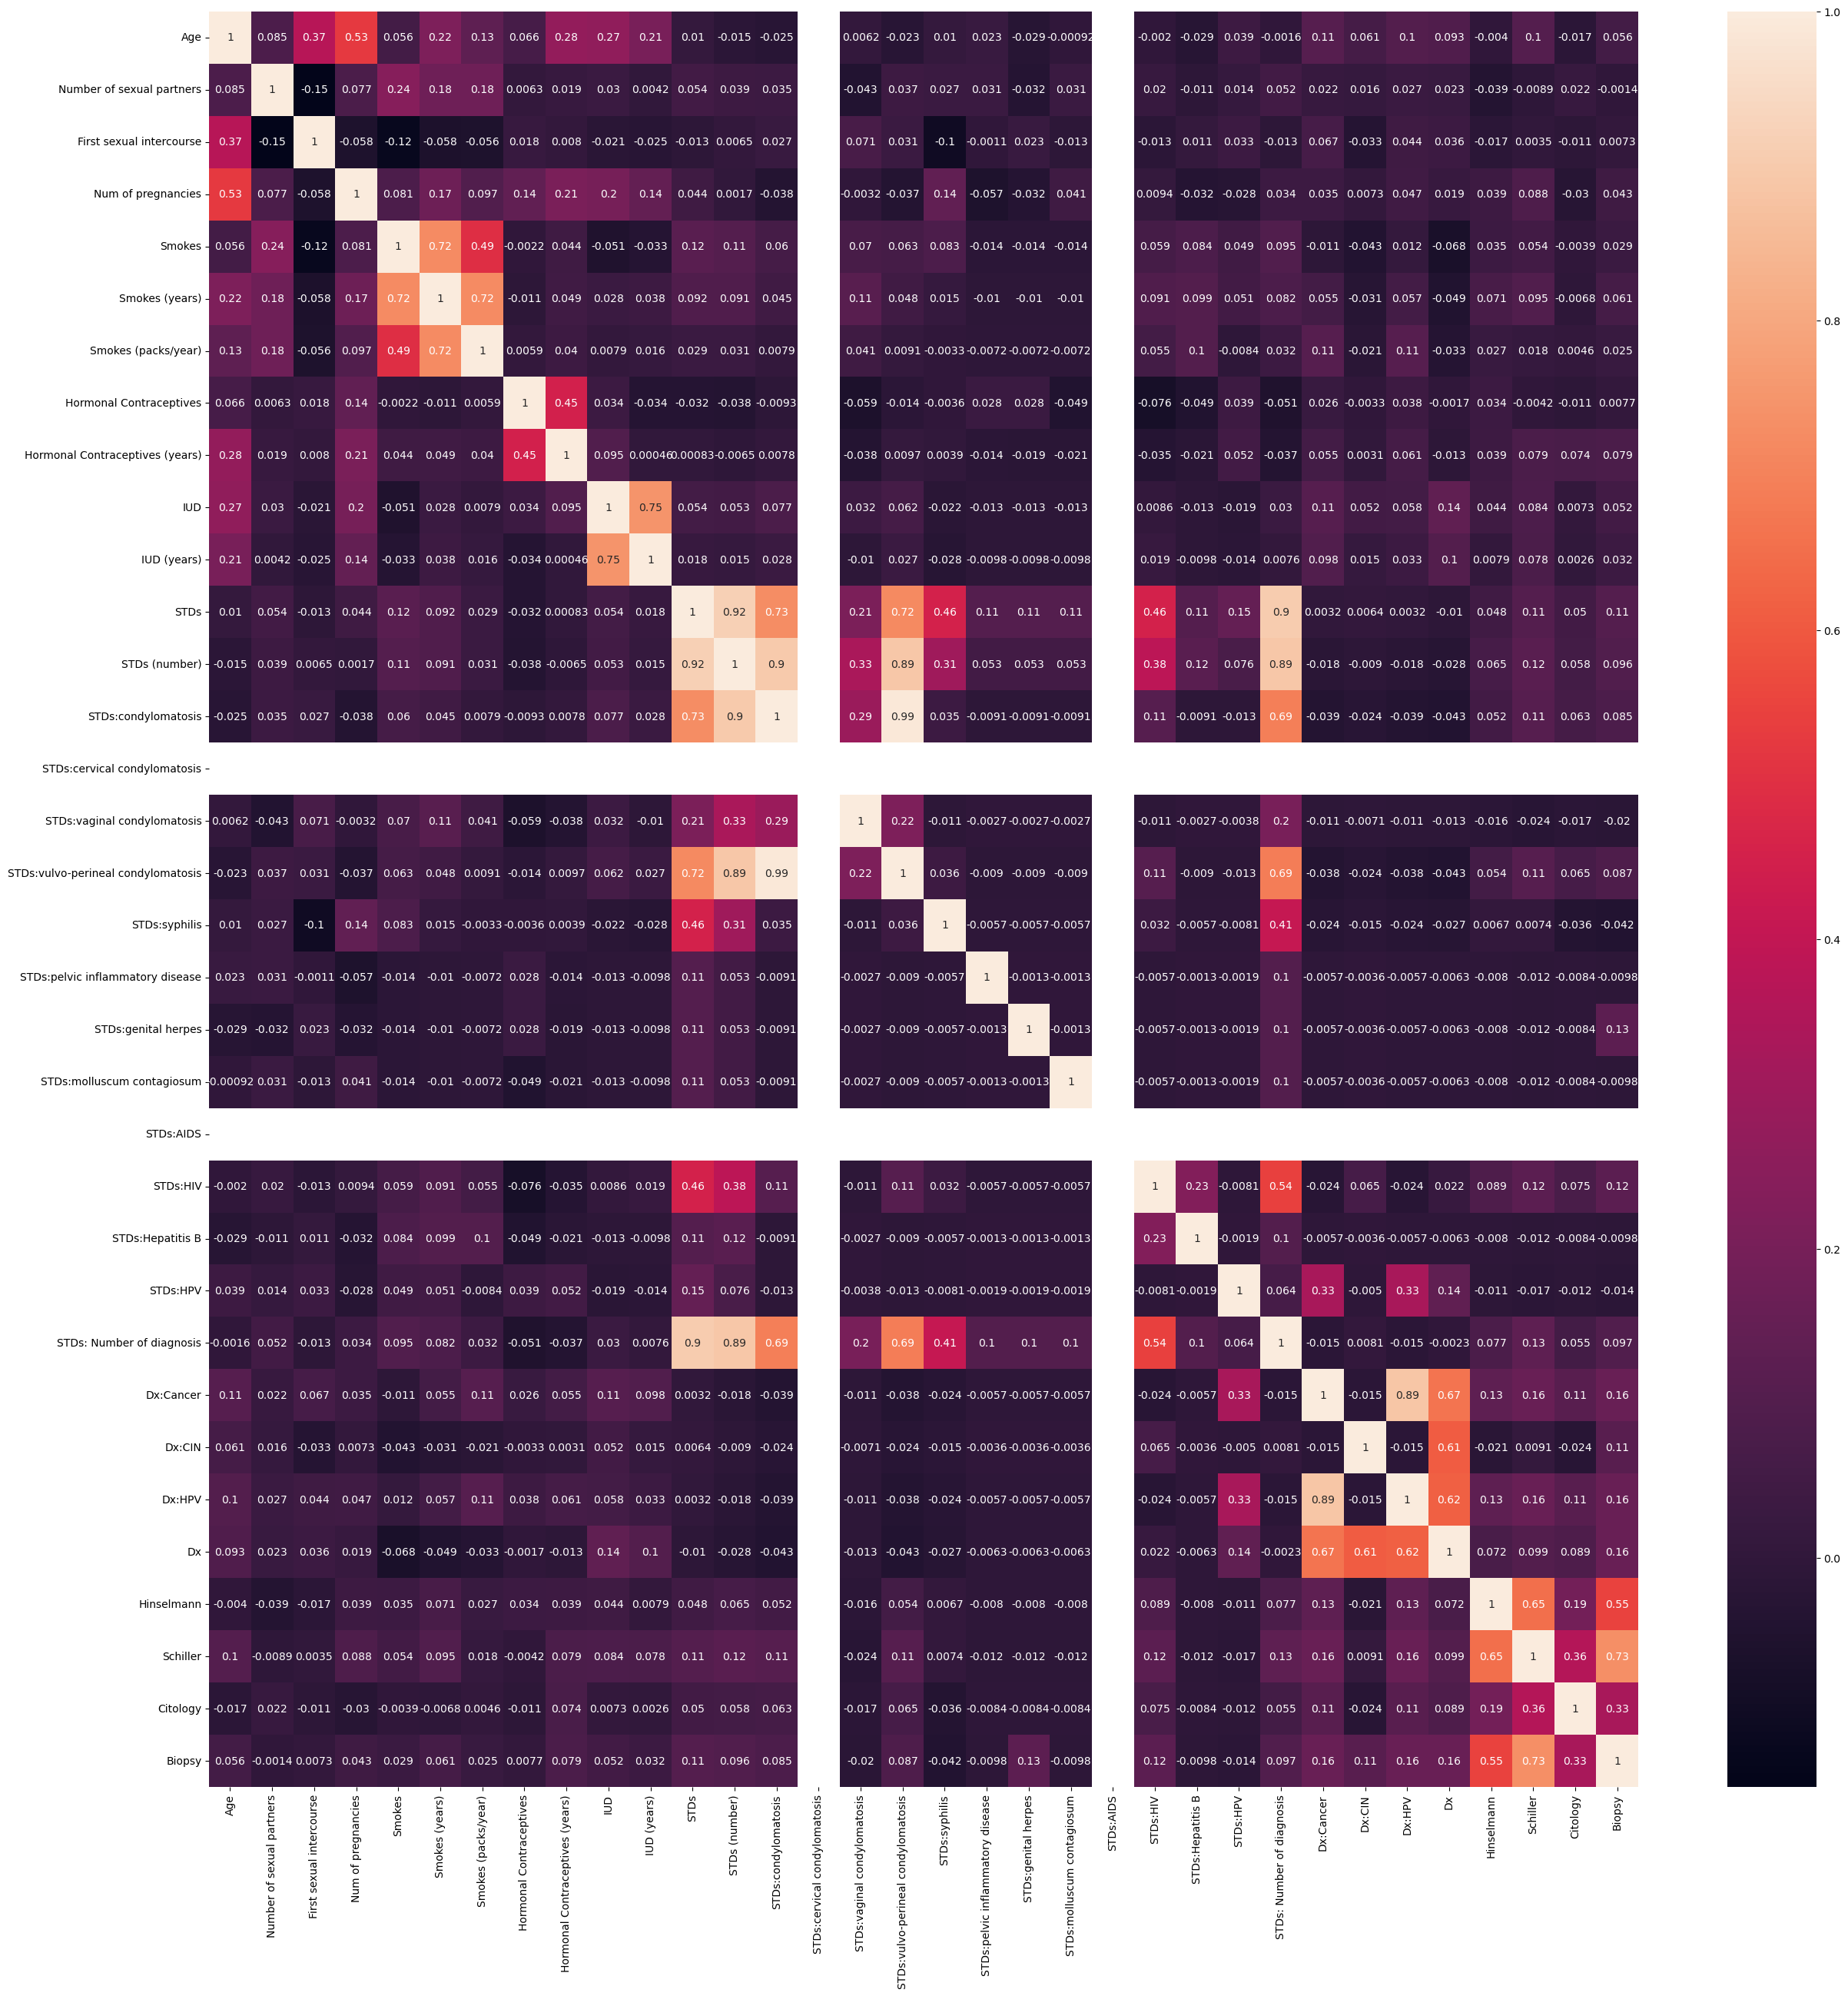

In [94]:
# Create a correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

This is a heatmap that depicts all the different correlations between the features. The color bar or the **C bar** on the right acts like a legend. When the number is closer to 1, the color becomes lighter, and when the number is closer to 0, the color becomes darker. The diagonal values on the heatmap are invariably lighter- which shows that **any variable is positively directly correlated with itself**. 

The next step would be to plot a **histogram** for the entire dataset.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Number of sexual partners'}>,
        <AxesSubplot:title={'center':'First sexual intercourse'}>,
        <AxesSubplot:title={'center':'Num of pregnancies'}>,
        <AxesSubplot:title={'center':'Smokes'}>,
        <AxesSubplot:title={'center':'Smokes (years)'}>],
       [<AxesSubplot:title={'center':'Smokes (packs/year)'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives (years)'}>,
        <AxesSubplot:title={'center':'IUD'}>,
        <AxesSubplot:title={'center':'IUD (years)'}>,
        <AxesSubplot:title={'center':'STDs'}>],
       [<AxesSubplot:title={'center':'STDs (number)'}>,
        <AxesSubplot:title={'center':'STDs:condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:cervical condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:vaginal condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs

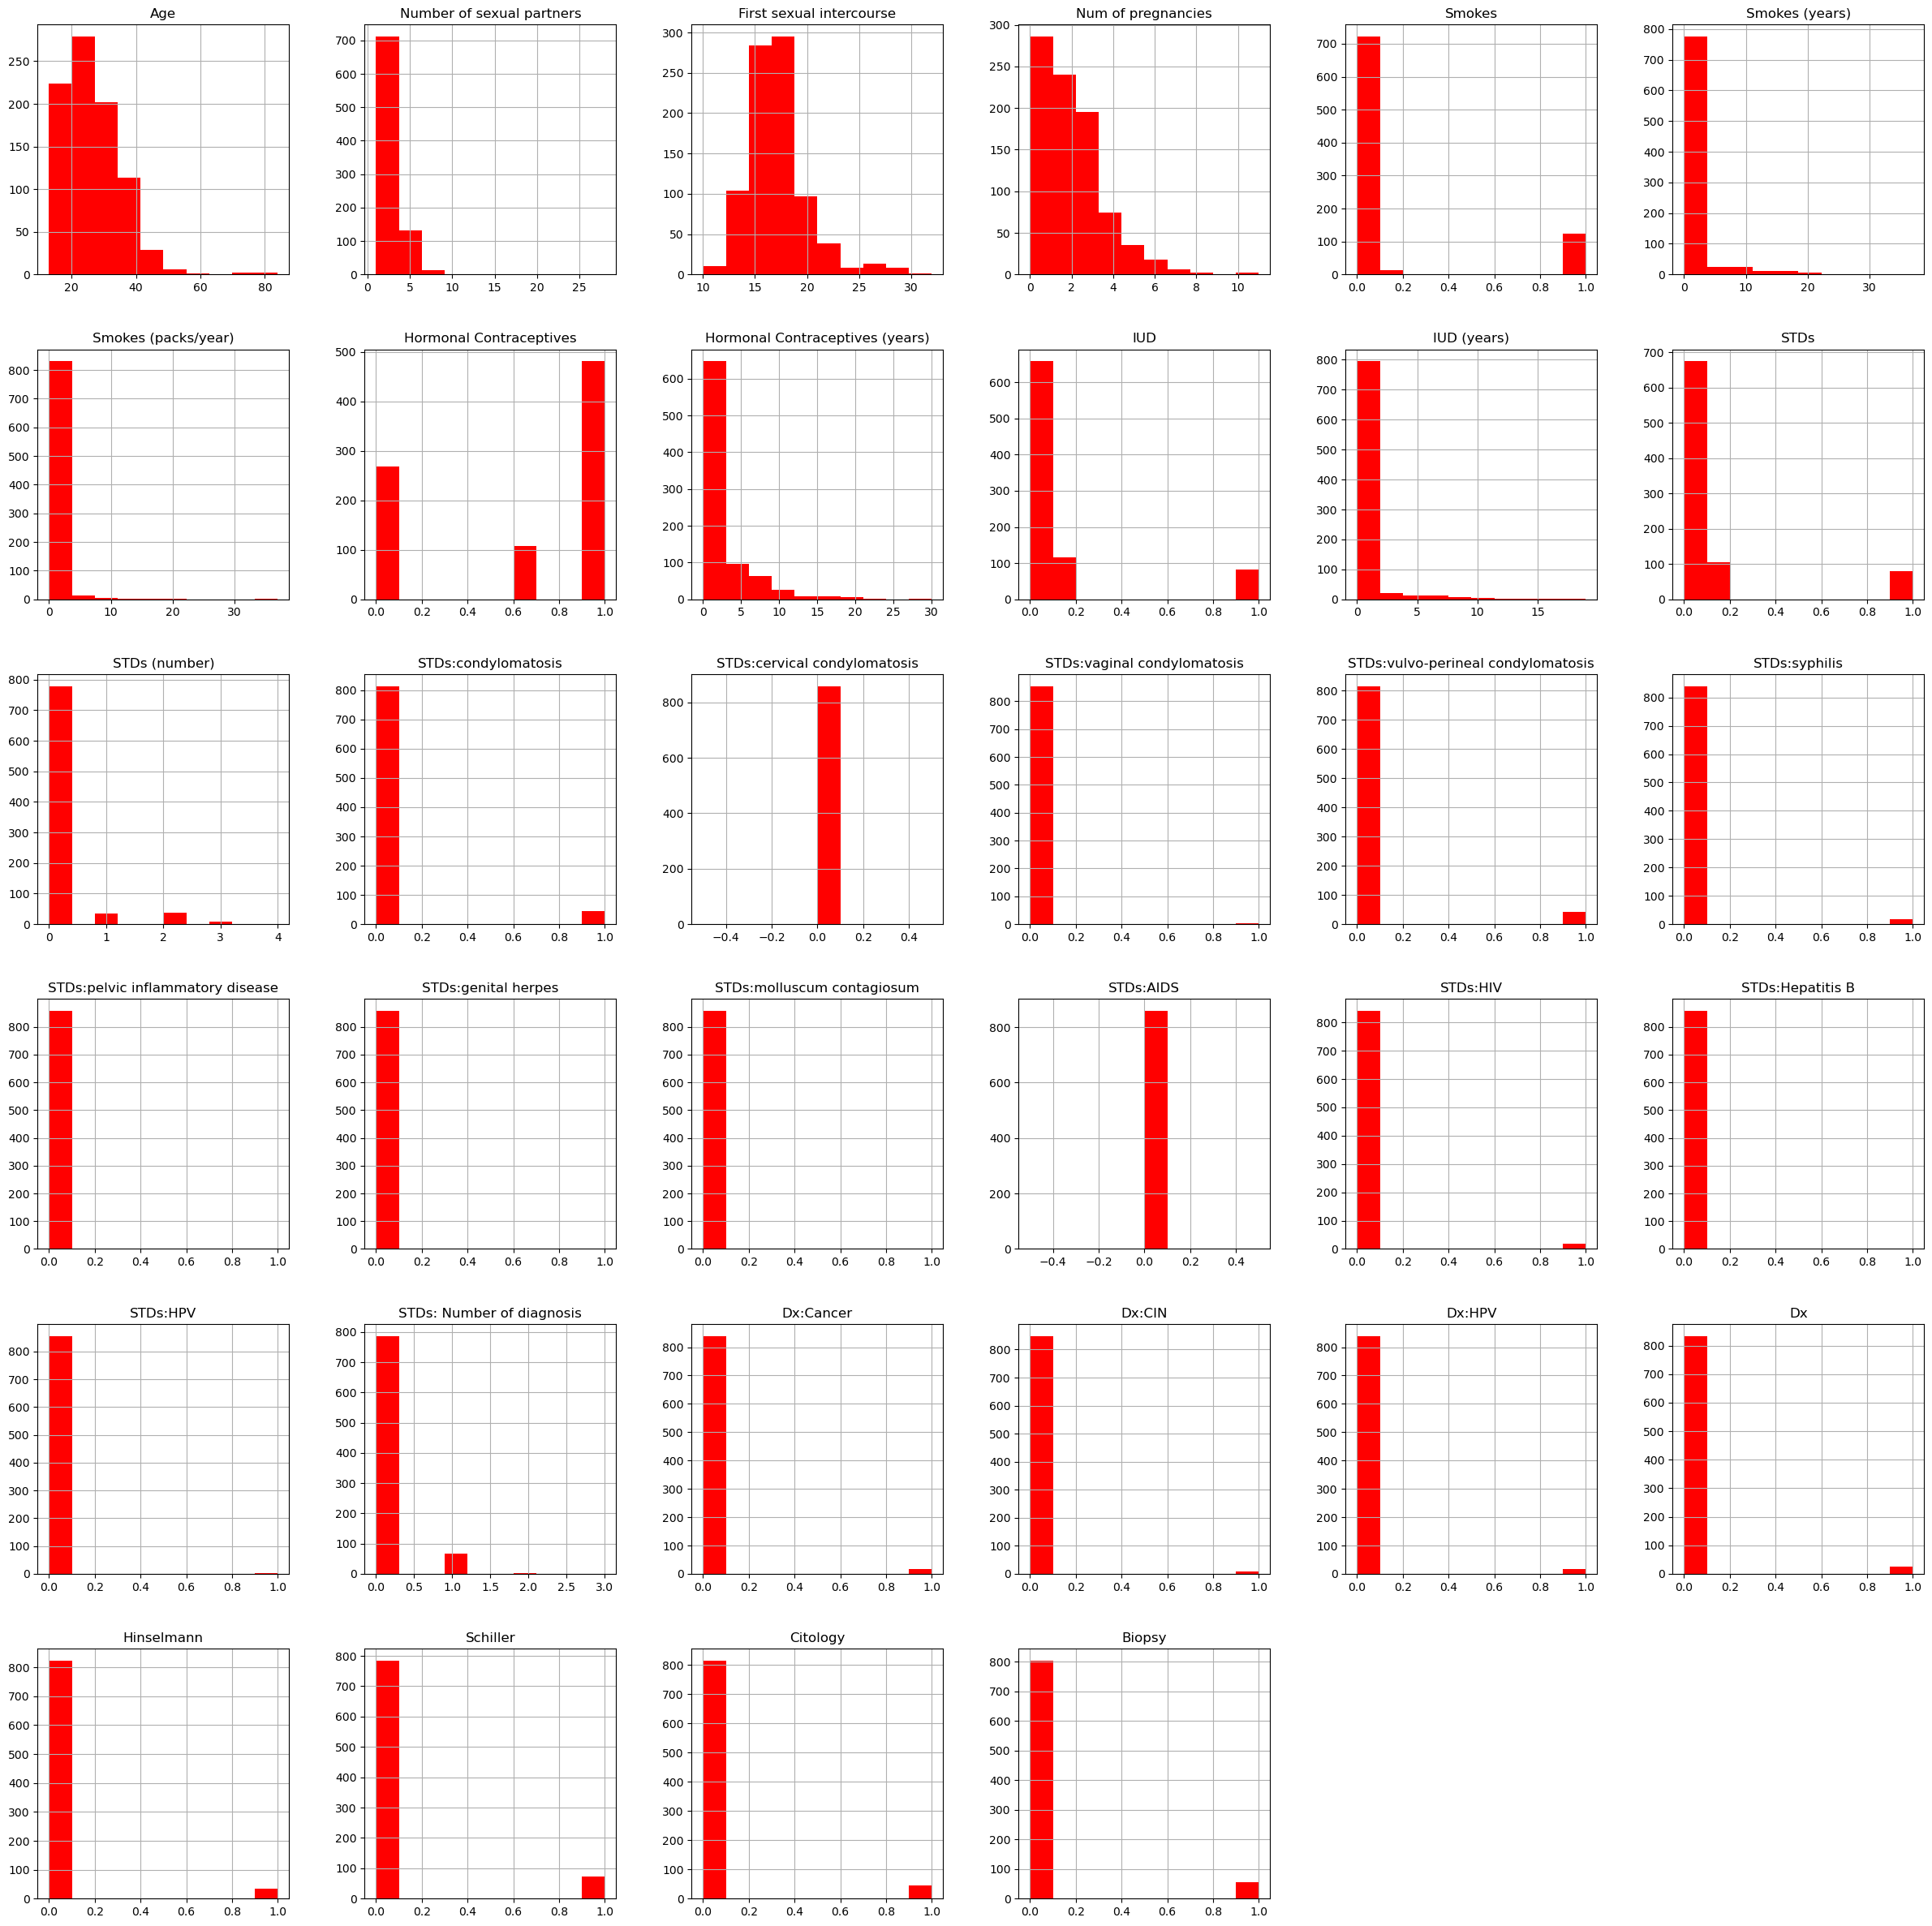

In [95]:
# Plot a histogram
cervical_df.hist(bins= 10, figsize= (30, 30), color= 'r')

In the age distribution, a number of participants in the study fall between 20 and 30 years old, and it tapers off beyond the age of 50. In the biopsy distribution, it looks like a lot of pateints have been diagnosed with no cervial canver, while a small number of them have been diagnosed with it. For the first sexual intercourse, the ages fall between 15 and 20 years old approximately. Similarly, the rest of the features are also distributed in the visualizations above.

# Data Preparation Before Model Training
This step would entail setting the **targets and inputs** for model training

In [96]:
target_df = cervical_df['Biopsy']
features_df = cervical_df.drop(columns = ['Biopsy'])
display(target_df.shape)
features_df.shape

(858,)

(858, 33)

The target df has 858 rows and 1 column; the features df has 858 rows and 33 columns, as expected. 

In [97]:
# Datatype conversion
X = np.array(features_df). astype('float32')
y = np.array(target_df).astype('float32')
y.shape

(858,)

In [98]:
# Scale the data - Import relevant libraries 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Instantiate an object out of the class
scaler = StandardScaler()

# Apply fit_transform method on the object, and pass it along with X
X = scaler.fit_transform(X)
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

This is the **normalized/ scaled dataset**. Next, I will **split the data into training and testing sets**.

In [99]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Split test data into validation and test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size= 0.5)

# The XGBoost Algorithm
XGBoost is a **supervised learning algorithm** that implements gradient boosted trees. It works by combining an **emsemble of predictions from several weak models**. The XGBoost trains several models where each new model is created by learning from the mistakes from the previous models.It is robust to many data distributions and provides many hyperparameters to tune the model, and so the model can be customized easily based on the model at hand. XGBoost offers increased speed and enhanced memory usage.

**What is Boosting?** <br>
Boosting is an ensemble machine learning technique that works by training weak models in a sequential manner. It learns from previous mistakes to come up with better future predictions. The first model is built from the training data; the second model is built based on the residuals (errors) from the first model, and so on. The algorithm repeats until the model provides good predictions. 

**Boosting Process Example** <br>
1. Model 1 will attempt to classify the two classes with a vertical line by assigning equal weights to all data points. 
2. Model 2 learns from the mistakes of the previous model by assigning more weight to the weongly classified data points. It draws a vertical line that 'properly' classifies the points this time. 
3. Model 3 learns from the mistakes of Model 2, and draws a horizontal line.
4. Model 4 combines the mistakes from all the weak models to build a much stronger model that correctly classifies all the data points. 

**What is XGBoost?** <br>
The gradient boosting algorithm incorporates a **learning rate** to avoid overfitting the model. XGBoost is superior compared to gradient boosting as it offers a **good balance between bias and variance**. Gradient boosting only optimizes the variance, and so it tends to overfit the training data, while XGBoost offers regularization terms that improves model generalization. 

# Training and Evaluating the XGBoost Classifier


In [100]:
# Install xgboost
!pip install xgboost

In [101]:
# Train an XGBoost classifier 
import xgboost as xgb

# Instantiate an object (max_depth = depth of the tree, n_estimators = how many models to use)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 10)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

The model has now been trained. Next, I will evaluate the model. 

In [102]:
# Evaluate the accuracy of the model
result_train = model.score(X_train, y_train)
display(result_train)

result_test = model.score(X_test, y_test)
result_test

0.98

0.9302325581395349

Almost **97% accuracy** has been achieved on the **training set** and around **96% accuracy** on the **test set**, which is pretty good given that the model has never seen the test data before. Next, I will make predictions on the test data. 

In [103]:
# Make predictions on test data
y_predict = model.predict(X_test)

# Obtain classification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       120
         1.0       0.50      0.67      0.57         9

    accuracy                           0.93       129
   macro avg       0.74      0.81      0.77       129
weighted avg       0.94      0.93      0.93       129



The accuracy is 97%. Class 0 (No cancer) has a **precision and recall** of 99% and 98% respectively. Class 1 (cancer) has a precision and recall of 67% and 86% respectively, which is kind of okay, but not too great.

<AxesSubplot:>

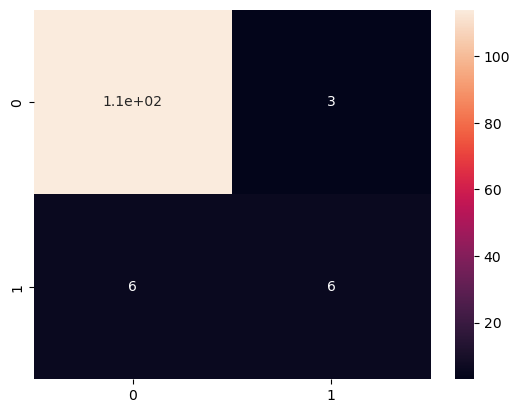

In [104]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot= True)

Around 120 samples were correctly classified as Class 0, and 6 samples were correctly classified as Class 1. Around 4 samples were misclassified. Increasing the depth of each tree and number of models to be trained (estimators) will dramatically improve overall accuracy, precision, and recall. 


That is the end of my project where I used an XGBoost classifier to train and evaluate the model to predict the risk of cervical cancer in a patient. 

---

# The End